# Importing packages


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5
import warnings
warnings.filterwarnings('ignore')

# lets pull the data

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!mkdir dataset
!kaggle datasets download -d shenba/electricity-production
!unzip electricity-production.zip -d dataset

Saving kaggle.json to kaggle.json
  0% 0.00/3.05k [00:00<?, ?B/s]
100% 3.05k/3.05k [00:00<00:00, 2.40MB/s]
Archive:  electricity-production.zip
  inflating: dataset/Electric_Production.csv  
  inflating: dataset/sales-of-shampoo-over-a-three-ye.csv  


# lets load the dataset

In [7]:
electricitytimeseries = pd.read_csv('/content/dataset/Electric_Production.csv',header = 0,index_col = 0)
electricitytimeseries.head(20)

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
6/1/1985,58.0904
7/1/1985,62.6202
8/1/1985,63.2485
9/1/1985,60.5846


In [6]:
electricitytimeseries.shape

(397, 1)

# Moving Avaerage Method

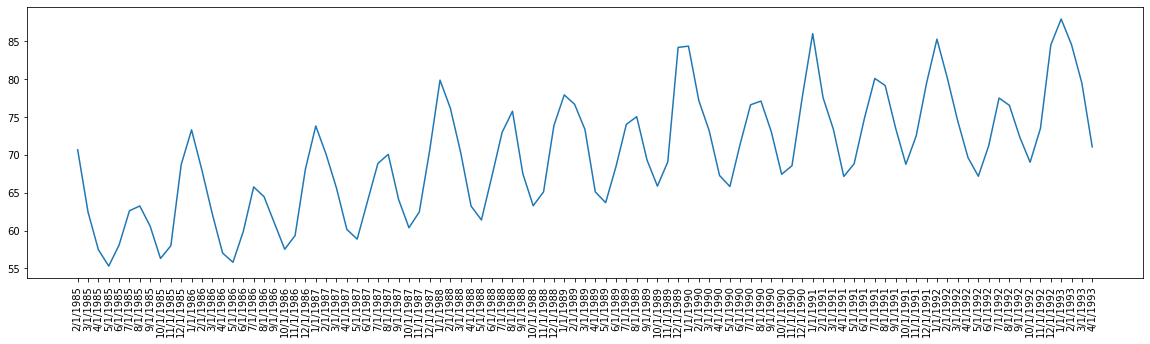

In [10]:
plt.plot(electricitytimeseries[1:100]['IPG2211A2N'])
plt.xticks(rotation = 90)
plt.show()

In [12]:
# rolling average transform
rollingseries = electricitytimeseries[1:100].rolling(window = 5)
rollingmean = rollingseries.mean()
print(rollingmean.head(10))

           IPG2211A2N
DATE                 
2/1/1985          NaN
3/1/1985          NaN
4/1/1985          NaN
5/1/1985          NaN
6/1/1985     60.79982
7/1/1985     59.18946
8/1/1985     59.34912
9/1/1985     59.97176
10/1/1985    60.17182
11/1/1985    60.15384


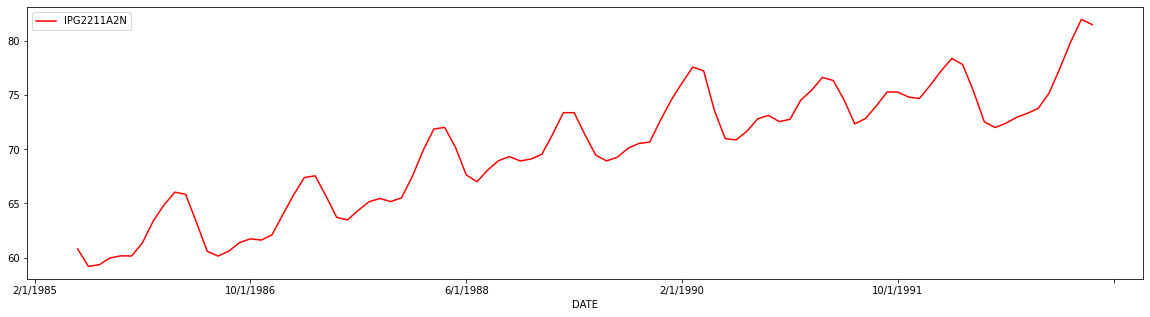

In [15]:
rollingmean.plot(color = 'red')
plt.show()

           IPG2211A2N
DATE                 
2/1/1985          NaN
3/1/1985          NaN
4/1/1985          NaN
5/1/1985          NaN
6/1/1985          NaN
7/1/1985          NaN
8/1/1985          NaN
9/1/1985          NaN
10/1/1985         NaN
11/1/1985    60.47683


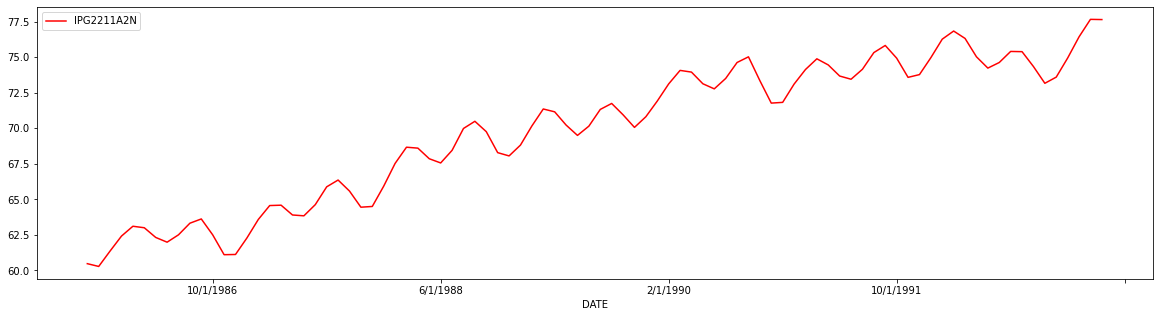

In [16]:
# rolling average transform
rollingseries = electricitytimeseries[1:100].rolling(window = 10)
rollingmean = rollingseries.mean()
print(rollingmean.head(10))
rollingmean.plot(color = 'red')
plt.show()

# Simple Exponential Smoothing

In [19]:
# Exponential smoothing-single
data = electricitytimeseries[1:100]
fit1 = SimpleExpSmoothing(data).fit(smoothing_level = 0.2,optimized = False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level = 0.8,optimized = False)

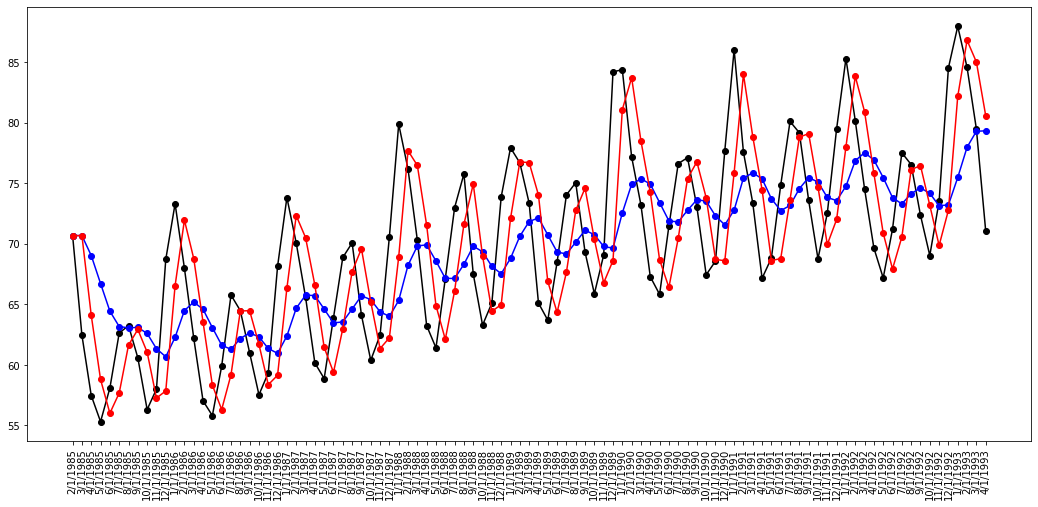

In [24]:
plt.figure(figsize = (18,8))
plt.plot(electricitytimeseries[1:100],marker = 'o',color = 'black')
plt.xticks(rotation = 90)
plt.plot(fit1.fittedvalues,marker = 'o',color = 'blue')
plt.plot(fit2.fittedvalues,marker = 'o',color = 'red')

# Holt Method for Exponential Smoothing

In [33]:
fit1 = Holt(data).fit() #linear trend
fit2 = Holt(data,exponential = True).fit() # exponential trend

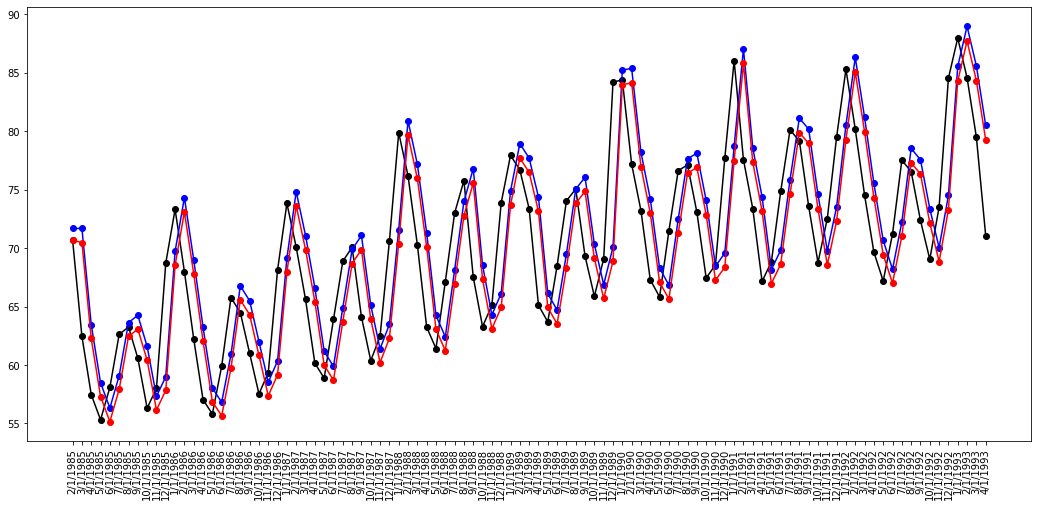

In [34]:
plt.figure(figsize = (18,8))
plt.plot(data,marker = 'o',color = 'black')
plt.xticks(rotation = 90)
plt.plot(fit1.fittedvalues+1,marker = 'o',color = 'blue')
plt.plot(fit2.fittedvalues,marker = 'o',color = 'red')